## Learning Outcomes
- Exploratory data analysis & preparing the data for model building. 
- Machine Learning - Supervised Learning Classification
  - Logistic Regression
  - Naive bayes Classifier
  - KNN Classifier
  - Decision Tree Classifier
  - Random Forest Classifier
  - Ensemble methods
- Training and making predictions using different classification models.
- Model evaluation

## Objective: 
- The Classification goal is to predict “heart disease” in a person with regards to different factors given. 

## Context:
- Heart disease is one of the leading causes of death for people of most races in the US. At least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. 
- Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Machine learning methods may detect "patterns" from the data and can predict whether a patient is suffering from any heart disease or not..

## Dataset Information

#### Source: https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?datasetId=1936563&sortBy=voteCount
Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. 

This dataset consists of eighteen columns
- HeartDisease: Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
- BMI: Body Mass Index (BMI)
- Smoking: smoked at least 100 cigarettes in your entire life
- AlcoholDrinking: Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
- Stroke:Ever had a stroke?
- PhysicalHealth: physical health, which includes physical illness and injury
- MentalHealth: for how many days during the past 30 days was your mental health not good?
- DiffWalking: Do you have serious difficulty walking or climbing stairs?
- Sex: male or female?
- AgeCategory: Fourteen-level age category
- Race: Imputed race/ethnicity value
- Diabetic: diabetes?
- PhysicalActivity: Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
- GenHealth: Would you say that in general your health is good, fine or excellent?
- SleepTime: On average, how many hours of sleep do you get in a 24-hour period?
- Asthma: you had asthma?
- KidneyDisease: Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
- SkinCancer: Ever had skin cancer?

### 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

import sklearn

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

from sklearn.ensemble import StackingClassifier

### 2. Load the dataset and display a sample of five rows of the data frame.

In [4]:
# loading the dataset

try:
    df = pd.read_csv('heart_2020_cleaned.csv')
except FileNotFoundError: # if file path is invalid of the file does not exist
    print("File not found.")
except pd.errors.EmptyDataError: # if the file is empty or has no data
    print("No data")
except pd.errors.ParserError: # if the file has malformed or invalid data that cannot be parsed.
    print("Parse error")
except UnicodeDecodeError: # if the file has a different encoding than the default or specified one.
    print("Encoding error")
except Exception: # handling other exceptions
    print("Error encountered! Please review your code")

# reading the data
df.sample(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
259685,No,36.05,No,No,No,0.0,3.0,Yes,Female,55-59,White,Yes,Yes,Fair,5.0,Yes,No,No
96414,No,30.67,Yes,No,No,0.0,0.0,No,Male,35-39,White,No,Yes,Good,8.0,No,No,No
203621,No,21.48,No,No,No,1.0,0.0,No,Female,65-69,White,No,Yes,Very good,7.0,Yes,No,No
185100,No,44.08,No,No,No,0.0,0.0,No,Male,55-59,White,Yes,Yes,Fair,7.0,No,No,No
5146,No,28.25,No,No,No,0.0,7.0,No,Female,18-24,Black,No,Yes,Excellent,8.0,No,No,No


### 3. Check the shape of the data (number of rows and columns). Check the general information about the dataframe using the .info() method.

In [5]:
# shape of the data
print('Shape of the Data :', df.shape)
print('Number of Rows in the Data :', df.shape[0])
print('Number of Columns in the Data :', df.shape[1],'\n')

# general information about the dataset
print('General information about the dataframe :\n')
df.info()

Shape of the Data : (319795, 18)
Number of Rows in the Data : 319795
Number of Columns in the Data : 18 

General information about the dataframe :

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth      

- The dataframe has 18 columns.
- The columns fall under two datatypes : float and object
- Each column has 319795 records
- There are no null values in the dataframe

### 4. Check the statistical summary of the dataset and write your inferences.

In [6]:
# statistical summary of the numerical columns
print('Statistical summary of the numerical columns :\n')
df.describe(include='number').T

Statistical summary of the numerical columns :



,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


### Inferences:
#### BMI, PhysicalHealth, MentalHealth, SleepTime:
The spread in the data for these numerical columns varies:
- BMI: The data shows a relatively wide spread, ranging from 12.02 to 94.85, indicating variability in body mass index among respondents.
- PhysicalHealth and MentalHealth: Most respondents report values near 0, suggesting that the majority of individuals in the dataset have good physical and mental health. However, there is a significant standard deviation, indicating some variability in reported health status.
- SleepTime: The majority of respondents report sleeping between 6 and 8 hours per day, with some variability around this range.

#### Outliers:
- Outliers may be present in the BMI column, as indicated by the maximum value of 94.85. These outliers could represent extreme cases of obesity.
- Outliers may also be present in the PhysicalHealth and MentalHealth columns, with values greater than the 75th percentile potentially indicating poor health status.

In [7]:
# statistical summary of the categorical columns
print('Statistical summary of the categorical columns :')
df.describe(include='object').T

Statistical summary of the categorical columns :


,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


### Inferences 

#### HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, PhysicalActivity, Asthma, KidneyDisease, SkinCancer:
The spread in the data for these categorical columns is limited to the unique values present in each column.
Inferences:
- The majority of respondents do not report heart disease, smoking, alcohol consumption, stroke, difficulty walking, asthma, kidney disease, or skin cancer, as indicated by the frequency of "No" responses in each respective column.

#### Outliers:
- Outliers are not applicable to categorical data in the same sense as numerical data. 
- However, rare or unexpected responses may be considered as anomalies or irregularities in the dataset. 
- For example, if there are very few respondents who report "Yes" for heart disease in a population where heart disease is prevalent, this could be considered an outlier in the context of the dataset.

### 5. Check the percentage of missing values in each column of the data frame. Drop the missing values if there are any.

In [8]:
print('Percentage of missing values in each column of the data frame :\n')
df.isnull().sum()/len(df)*100 # number of null values divided by total no. of rows 

Percentage of missing values in each column of the data frame :



HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64

- There are no missing values in the dataframe

### 6. Check if there are any duplicate rows. If any drop them and check the shape of the dataframe after dropping duplicates.

In [9]:
print('The shape of the dataframe before dropping duplicates :', df.shape)
print('Duplicate Rows :', len(df[df.duplicated()]))

The shape of the dataframe before dropping duplicates : (319795, 18)
Duplicate Rows : 18078


In [10]:
# dropping the duplicated records
df.drop_duplicates(inplace=True)

In [11]:
print('Duplicate Rows after dropping:', len(df[df.duplicated()]))
print('The shape of the dataframe after dropping duplicates :', df.shape)

Duplicate Rows after dropping: 0
The shape of the dataframe after dropping duplicates : (301717, 18)


### 7. Check the distribution of the target variable (i.e. 'HeartDisease') and write your observations.

Text(0.5, 1.0, 'Distribution of the target variable, HeartDisease')

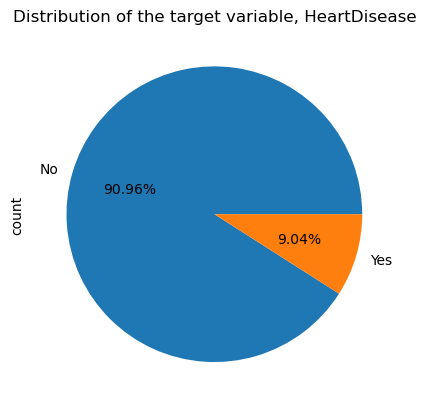

In [12]:
df['HeartDisease'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.title('Distribution of the target variable, HeartDisease')

### Observations
- Approximately 90.96% of the observed population does not have heart disease.
-  About 9.04% of cases have been diagnosed with heart disease.
- The majority of the population falls into the ‘No’ category, indicating a low prevalence of heart disease in the dataset.
- The distribution is highly imbalanced as it is skewed to the 'No' Category

### 8. Visualize the distribution of the target column 'Heart disease' with respect to various categorical features and write your observations.

In [13]:
categorical_cols = df.select_dtypes(include='object')
print('List of Categorical Features :', categorical_cols.columns.tolist())

List of Categorical Features : ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']


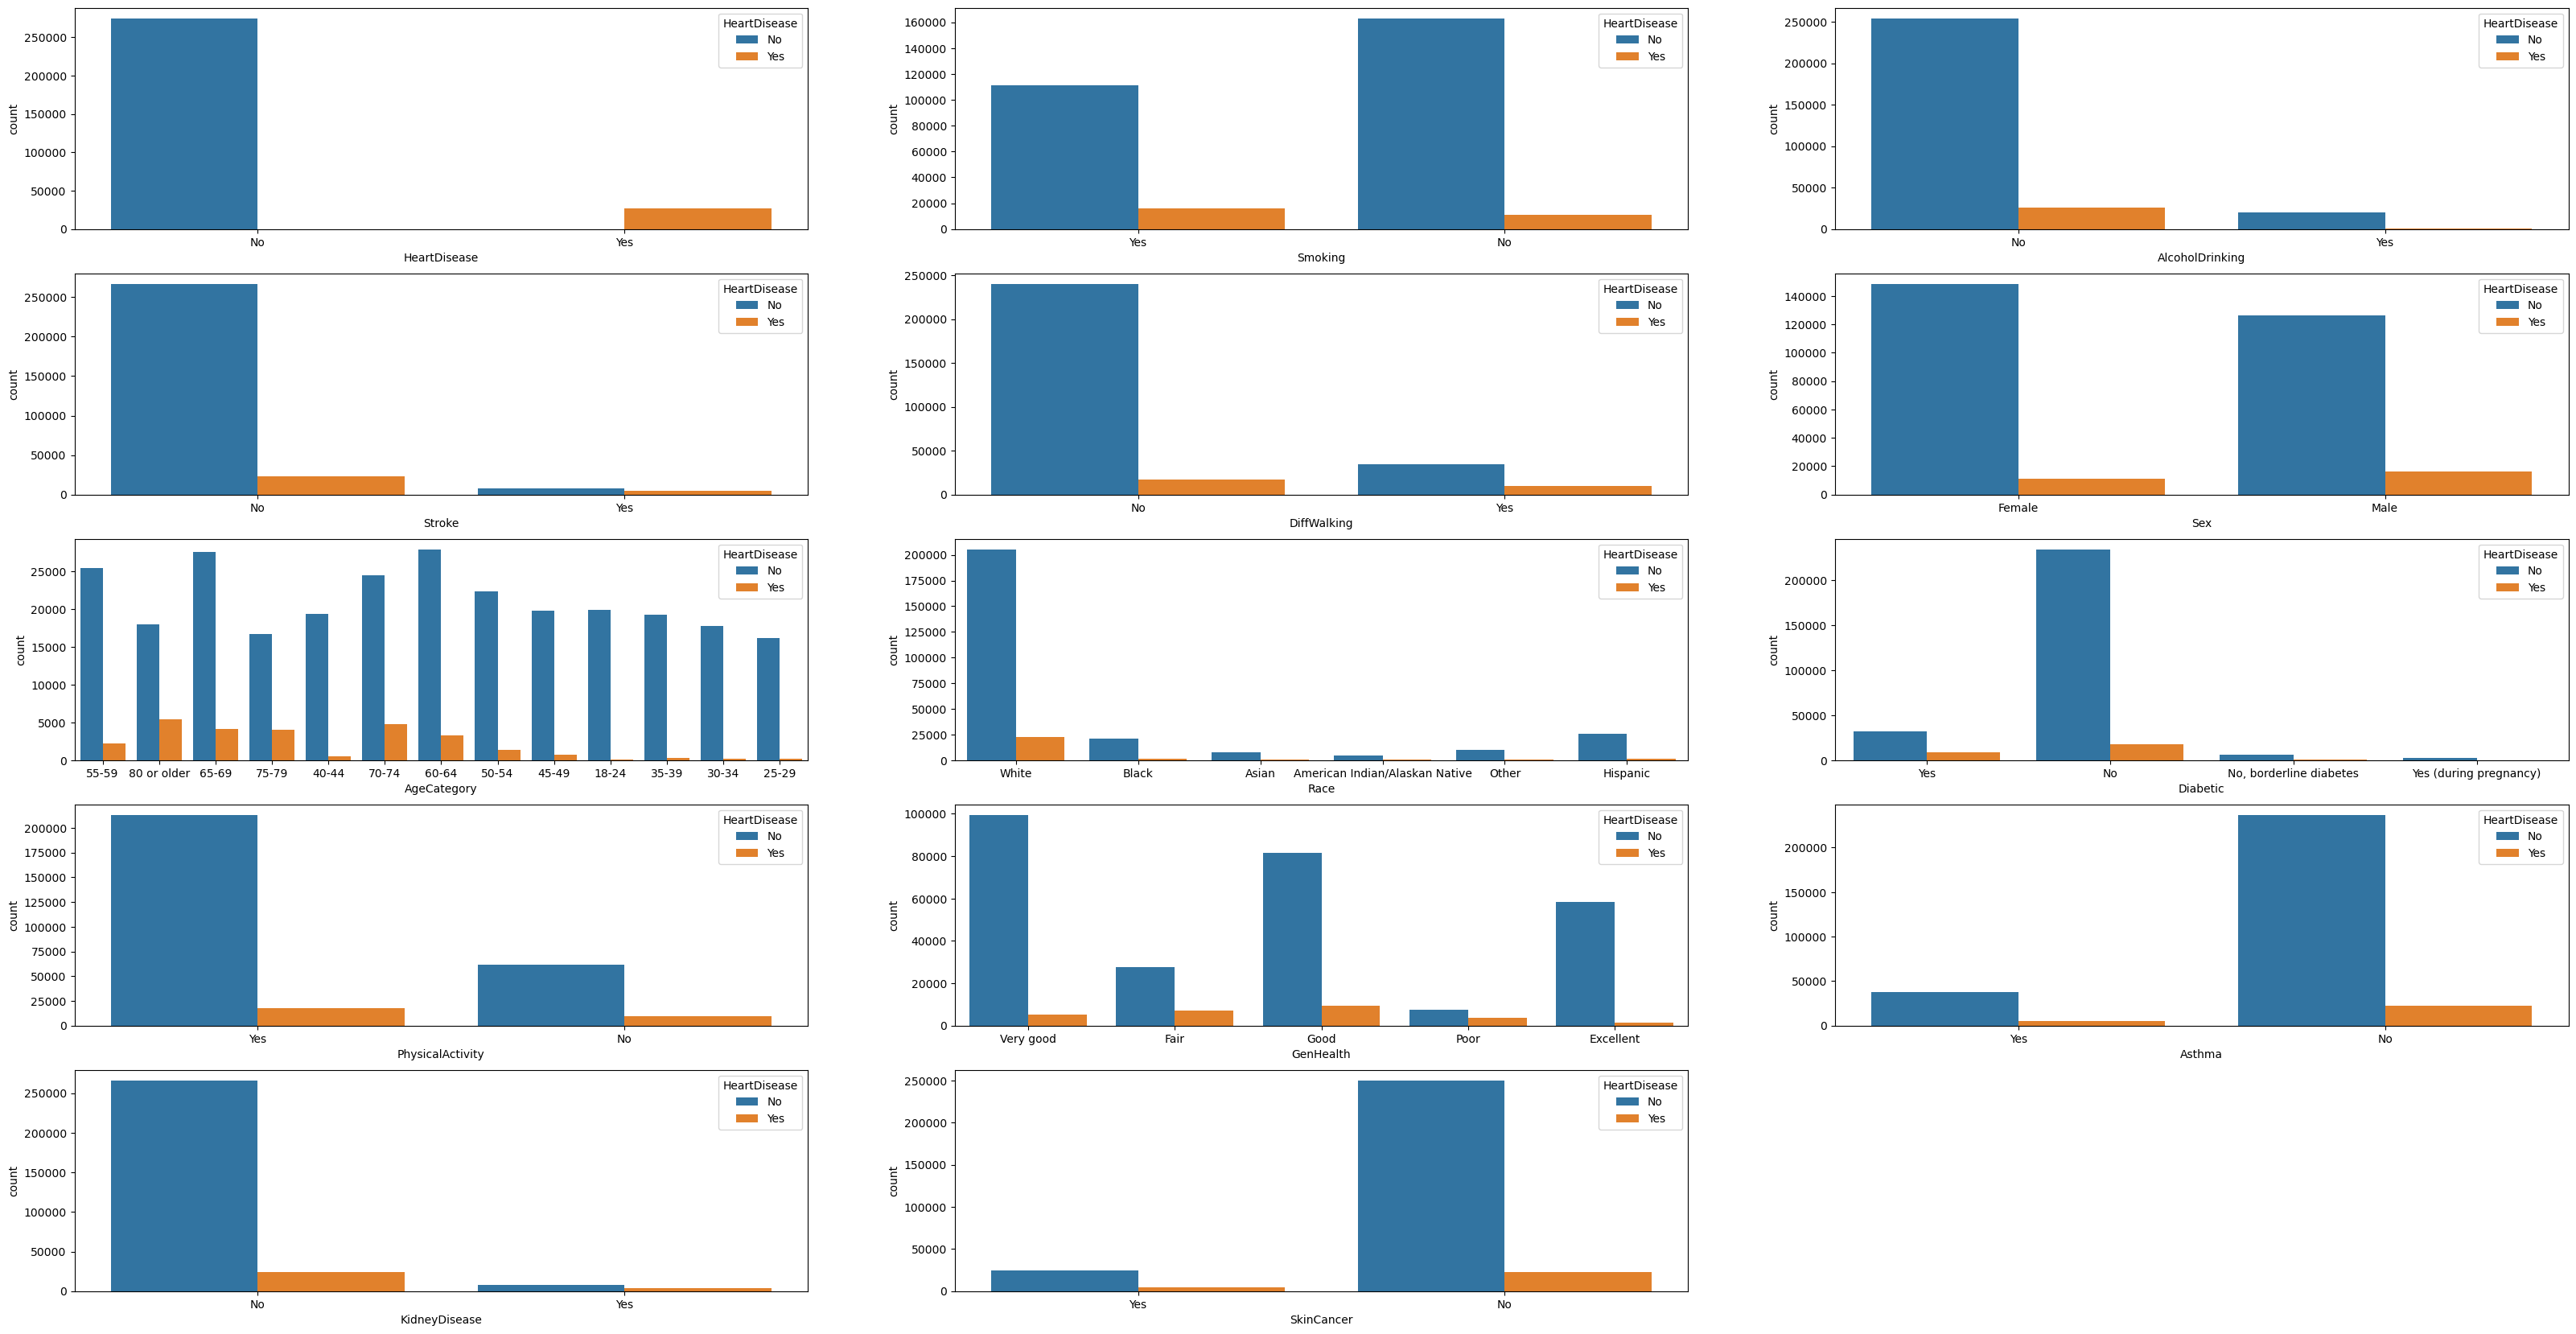

In [14]:
i = 1
plt.figure(figsize=(40,25))
plt.title('The distribution of the target column "Heart disease" with respect to various categorical features')

for col in categorical_cols:
    plt.subplot(6,3,i)
    sns.countplot(x=col, hue='HeartDisease', data=df)
    i+=1

### Observations
- The majority class (No) constitutes approximately 90.96% of the cases, while the minority class (Yes) represents only about 9.04%.
- Factors that lead to Heart Disease : Smoking, Alchoholism, low physical activity, poor general health.
- People who have suffered a Stroke are less likely to develop Heart diseases
- People with a Diffwalking symptom are more likely to have a heart disease
- The number of Females in the data are more. Males are more likely to develop a heart disease
- People with ages greater than 60 are more at risk of developing a heart disease
- White people are more prone to heart disease
- People with Diabetic, Asthma, Kidney Disease, Skin Cancer may develop a heart disease.

### 9. Check the unique categories in the column 'Diabetic'. Replace 'Yes (during pregnancy)' as 'Yes' and 'No, borderline diabetes' as 'No'.

In [15]:
print('List of unique categories in "Diabetic" column :', df['Diabetic'].unique().tolist())

List of unique categories in "Diabetic" column : ['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)']


In [16]:
df['Diabetic'] = df['Diabetic'].replace(
    {'Yes (during pregnancy)':'Yes',
    'No, borderline diabetes':'No'} )

In [17]:
print('List of unique categories in "Diabetic" column after replacement:', df['Diabetic'].unique().tolist())

List of unique categories in "Diabetic" column after replacement: ['Yes', 'No']


### 10. For the target column 'HeartDiease', Replace 'No' as 0 and 'Yes' as 1. 

In [18]:
print('List of unique categories in "HeartDisease" column :', df['HeartDisease'].unique().tolist())
df['HeartDisease'] = df['HeartDisease'].replace({'Yes':1, 'No':0})
print('List of unique categories in "HeartDisease" column after replacement:', df['HeartDisease'].unique().tolist())

List of unique categories in "HeartDisease" column : ['No', 'Yes']
List of unique categories in "HeartDisease" column after replacement: [0, 1]


### 11. Label Encode the columns "AgeCategory", "Race", and "GenHealth". Encode the rest of the columns using dummy encoding approach.

In [19]:
# retreive the columns
object_type_var = [i for i in df[["AgeCategory", "Race","GenHealth"]] if df.dtypes[i]==object]
object_type_var

['AgeCategory', 'Race', 'GenHealth']

In [20]:
le  = LabelEncoder()

# defining a function to encode the columns
def encoder(df):
    for i in object_type_var:
        conv = le.fit_transform(df[i].astype(str))
        df[i] = conv
        df[i] = df[i].astype(int)

In [21]:
# call the function
encoder(df)

In [22]:
# dummy encoding the rest of the columns
df = pd.get_dummies(df, drop_first=True)

In [23]:
df.sample(5)

,HeartDisease,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
68534,0,30.72,0.0,0.0,0,5,0,7.0,False,False,False,False,False,False,True,False,False,False
59508,0,27.12,0.0,0.0,6,5,0,6.0,True,False,False,False,True,False,True,False,False,False
143563,0,24.41,10.0,3.0,12,5,1,7.0,False,False,False,True,False,True,True,False,False,False
54004,1,29.95,0.0,0.0,6,3,1,7.0,True,False,False,False,False,False,False,False,False,False
10850,0,29.05,0.0,0.0,9,5,0,6.0,True,False,False,False,False,False,True,False,False,False


### 12. Store the target column (i.e.'HeartDisease') in the y variable and the rest of the columns in the X variable.

### Model building process 

In [24]:
# Seperate the independent and target variables 
X = df.drop('HeartDisease',axis =1)
y = df['HeartDisease']

### 13. Split the dataset into two parts (i.e. 70% train and 30% test) and print the shape of the train and test data

In [25]:
## Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
print('Shape of training data :\n','X_train, y_train =>',X_train.shape,', ',y_train.shape)
print('Shape of testing data :\n','X_test, y_test =>',X_test.shape,', ',y_test.shape)

Shape of training data :
 X_train, y_train => (241373, 17) ,  (241373,)
Shape of testing data :
 X_test, y_test => (60344, 17) ,  (60344,)


### 14. Standardize the numerical columns using Standard Scalar approach for both train and test data.

In [26]:
# Intitializing standardization library
ss = StandardScaler()

# transforming independant numerical columns in train and test data
X_train.iloc[:,:7] = ss.fit_transform(X_train.iloc[:,:7])
X_test.iloc[:,:7] = ss.fit_transform(X_test.iloc[:,:7])

In [27]:
# sample standardized training data
X_train.sample(5)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
276866,0.373848,-0.438201,-0.506389,-0.981290,-1.108876,-1.469431,0.623077,False,False,False,False,True,False,True,False,False,False
5112,1.340311,-0.069422,1.342538,-0.702269,-0.298070,-0.807825,-0.740027,False,False,False,False,False,False,False,False,False,False
268125,-0.018922,-0.315274,-0.383127,0.971853,0.512736,1.176993,0.623077,True,True,False,False,True,False,True,False,False,True
137726,0.483639,-0.438201,-0.506389,1.529894,0.512736,-0.146219,3.349284,True,False,False,False,True,False,True,False,False,False
264611,-0.229225,-0.438201,-0.383127,-1.818351,0.512736,1.176993,-0.058475,False,False,False,False,True,False,False,False,False,False


In [28]:
# sample standardized testing data
X_test.sample(5)

,BMI,PhysicalHealth,MentalHealth,AgeCategory,Race,GenHealth,SleepTime,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,Diabetic_Yes,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes
210913,-0.279678,0.171192,-0.509720,0.145155,-1.891869,-1.470004,0.627556,False,True,False,False,False,False,True,False,False,False
15517,-1.152521,-0.196308,-0.509720,1.539273,0.516564,0.514646,0.627556,False,False,True,True,True,False,False,False,True,False
276259,-0.403266,0.048692,1.321866,-1.806610,0.516564,1.176196,0.627556,False,False,False,False,True,False,True,False,False,False
106086,0.511289,-0.441308,-0.509720,0.423979,0.516564,-0.146904,-0.054281,False,False,False,False,True,False,True,True,False,True
183915,-0.307485,3.233693,-0.509720,0.145155,0.516564,-0.808454,4.718577,True,False,False,True,True,True,False,False,False,False


### 15. Write a function.
- i) Which can take the model and data as inputs.
- ii) Fits the model with the train data.
- iii) Makes predictions on the test set.
- iv) Returns the Accuracy Score.

In [29]:
# defining a function to train the model, make predictions and return the accuracy score
def model_accuracy(model, X_train, y_train, X_test, y_test):
    # Fit the model with the train data
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Return the accuracy score
    return accuracy_score(y_test, y_pred)

### 16. Use the function and train a Logistic regression, KNN, Naive Bayes, Decision tree, Random Forest, Adaboost, GradientBoost, and Stacked Classifier models and make predictions on test data and evaluate the models, compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.

In [30]:
# loading all models required

log_reg_model = LogisticRegression()

knn_model= KNeighborsClassifier()

naive_bayes_model = GaussianNB()

dec_tree_model = DecisionTreeClassifier()

rand_forest_model =  RandomForestClassifier()

adaboost_model = AdaBoostClassifier()

gradboost_model = GradientBoostingClassifier()

In [31]:
# training the data for the logistic regression model and getting the accuracy score on the prediction
log_reg_accuracy = model_accuracy(log_reg_model, X_train, y_train, X_test, y_test)
print('Accuracy of Logistic Rgression Model : ',log_reg_accuracy)

Accuracy of Logistic Rgression Model :  0.909485615802731


In [32]:
# training the data for the K nearest neighbours model and getting the accuracy score on the prediction
knn_accuracy = model_accuracy(knn_model, X_train, y_train, X_test, y_test)
print('Accuracy of K Nearest Neighbours Model : ',knn_accuracy)

Accuracy of K Nearest Neighbours Model :  0.900338061779133


In [33]:
# training the data for the Naive Bayes model and getting the accuracy score on the prediction
nb_accuracy = model_accuracy(naive_bayes_model, X_train, y_train, X_test, y_test)
print('Accuracy of naive bayes Model : ',nb_accuracy)

Accuracy of naive bayes Model :  0.8413761103009413


In [34]:
# training the data for the decision tree model and getting the accuracy score on the prediction
dct_accuracy = model_accuracy(dec_tree_model, X_train, y_train, X_test, y_test)
print('Accuracy of decision tree Model : ',dct_accuracy)

Accuracy of decision tree Model :  0.8555448760440143


In [35]:
# training the data for the Random forest model and getting the accuracy score on the prediction
rf_accuracy = model_accuracy(rand_forest_model, X_train, y_train, X_test, y_test)
print('Accuracy of random forest Model : ',rf_accuracy)

Accuracy of random forest Model :  0.8979351716823545


In [36]:
# training the data for the Adaboost classifier model and getting the accuracy score on the prediction
adb_accuracy = model_accuracy(adaboost_model, X_train, y_train, X_test, y_test)
print('Accuracy of adaboost classifier Model : ',adb_accuracy)

Accuracy of adaboost classifier Model :  0.9101981970038446


In [37]:
# training the data for the Gradientboost classifier model and getting the accuracy score on the prediction
gdb_accuracy = model_accuracy(gradboost_model, X_train, y_train, X_test, y_test)
print('Accuracy of gradient boost classifier Model : ',gdb_accuracy)

Accuracy of gradient boost classifier Model :  0.9101650536921649


In [38]:
# Creating a Stacking Classifier by combining various base models
stacking_classifier_model = StackingClassifier(estimators=[
    ('logreg', log_reg_model),
    ('knn', knn_model),
    ('naive bayes', naive_bayes_model),
    ('decision tree', dec_tree_model),
    ('random forest', rand_forest_model),
    ('Adaboost model', adaboost_model),
    ('Gradient boost', gradboost_model)
], final_estimator = LogisticRegression())

stacking_classifier_model.fit(X_train, y_train)

stacking_classifier_prediction = stacking_classifier_model.predict(X_test)

print('Stacking Classifier accuracy: ', accuracy_score(y_test, stacking_classifier_prediction))

Stacking Classifier accuracy:  0.9098501922312078


### Conclusion

#### Model Comparison
- The accuracy scores for various models are as follows:
    - Logistic Regression: 90.95%
    - K Nearest Neighbors (KNN): 90.03%
    - Naive Bayes: 84.14%
    - Decision Tree: 85.55%
    - Random Forest: 89.79%
    - Adaboost Classifier: 91.02%
    - Gradient Boost Classifier: 91.02%
    - Stacking Classifier: 90.99%
    
#### Observations:
- Adaboost and Gradient Boost classifiers perform exceptionally well, closely followed by the Stacking Classifier. Logistic Regression also has a good accuracy score. 
- Naive Bayes has the lowest accuracy, indicating that it may not be suitable for this dataset.

#### Next Steps for Improvement:
- Feature Engineering:
    - Explore additional features or create new ones based on domain knowledge.
    - Consider interactions, transformations, and aggregations of existing features.
- Hyperparameter Tuning:
    - Fine-tune hyperparameters for each model.
    - Use techniques like grid search or random search to find optimal parameter values.
    - Ensemble Techniques:
    - Experiment with different ensemble methods (e.g., bagging, boosting, stacking).
    - Combine models to improve overall performance.
- Address Class Imbalance:
    - Since the dataset is imbalanced (majority class dominates), consider techniques like oversampling, - undersampling, or using synthetic data.
- Collect More Data:
    - If feasible, gather additional data to enhance model generalization.
- Evaluate Other Algorithms:
    - Try other algorithms (e.g., SVM, neural networks) to see if they perform better.
- Cross-Validation:
    - Use k-fold cross-validation to assess model stability and reduce overfitting.
- Domain-Specific Insights:
    - Consult domain experts to gain insights into relevant features and potential improvements.

----
## Happy Learning:)
----